In [36]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy
from scipy import ndimage
from pylab import *
import scipy.signal as signal

In [58]:
#1 carregar uma imagem em escala de cinza
img = cv2.imread('lenna.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
monocromatica = cv2.cvtColor(cv2.cvtColor(img,cv2.COLOR_RGB2GRAY), cv2.COLOR_GRAY2RGB) #preto e branco
#cv2.imshow("imagem", img)
#cv2.waitKey(0)  
#cv2.destroyAllWindows()  
print(img.shape)

(512, 512, 3)


In [59]:
#2 Função para receber um filtro e aplicar o 2D separável

#OBS: presumindo que o filtro dado será coluna ou linha (1D)

def filtro_separavel(kernel,img):
    img_linha = cv2.filter2D(img, -1, kernel) #convoluindo com um filtro 1d
    kernel = kernel.transpose()  #transpondo o kernel
    img_final = cv2.filter2D(img_linha, -1, kernel) #convoluindo com o mesmo filtro, transposto
    return(img_linha,img_final)
    

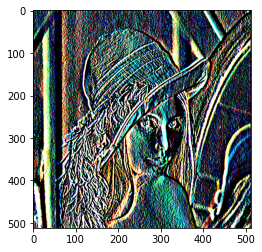

In [60]:
filtro =  np.array([[-10,0,10],[-20, 0, 20],[-10,0,10]])  #kernel derivativo de exemplo
pronto = cv2.filter2D(img, -1, filtro)
imshow(pronto)

In [61]:
def trunca(result):
    l = len(result)
    x = arange(0,l)
    stem(x, result)
    #ax.set_ylim(-2,2)
    ylabel('h[n]')
    xlabel(r'n (amostras)')
    title(r'Filtro derivador com 16 pontos em um intervalo simétrico e deslocado (Causal)')

    

/home/thamires/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in cdouble_scalars
  
/home/thamires/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


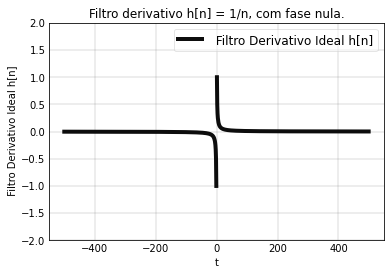

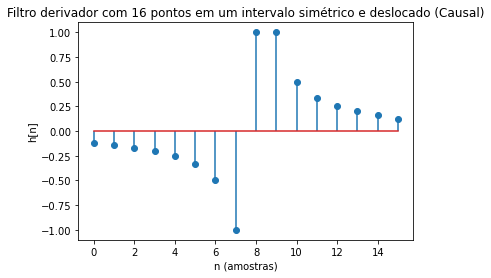

In [62]:
import numpy as np
import matplotlib.pyplot as plt # Matplotlib

#Calculando a inversa, filtro
def foo(x):
    return -1j*((2j*np.pi*x*np.exp(2j*np.pi*x) - np.exp(2j*np.pi*x) + 1) / (2*np.pi*x**2))
    #return int((1/n))

result = []
n = []
for i in range(-500,500):
    result.append(foo(i))
    n.append(i)
    
#Plotando    
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='w', axisbelow=True)
ax.plot(n, result, 'k', alpha=0.95, lw=4, linestyle='-', label=' Filtro Derivativo Ideal h[n]')

ax.legend(loc='best')
ax.set_title("Filtro derivativo h[n] = 1/n, com fase nula.")
ax.set_xlabel('t')
ax.set_ylabel(' Filtro Derivativo Ideal h[n]')
ax.set_ylim(-2,2)

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='0.45', lw=0.25, ls='-')
legend = ax.legend(prop={'size': 12})
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(True)

plt.show()

#Truncando em 16 pontos em um intervalo simétrico e deslocando para ficar causal:
#a = signal.firwin(16, cutoff = 0.3, window = "boxcar")

fir =np.zeros(16)
for i in range(-8,9):
    if i==0:
        fir[8] =1
    else:
        if i==8:
            fir[15]=(1/i)
        else:
            fir[i+8]= (1/i)
trunca(fir)




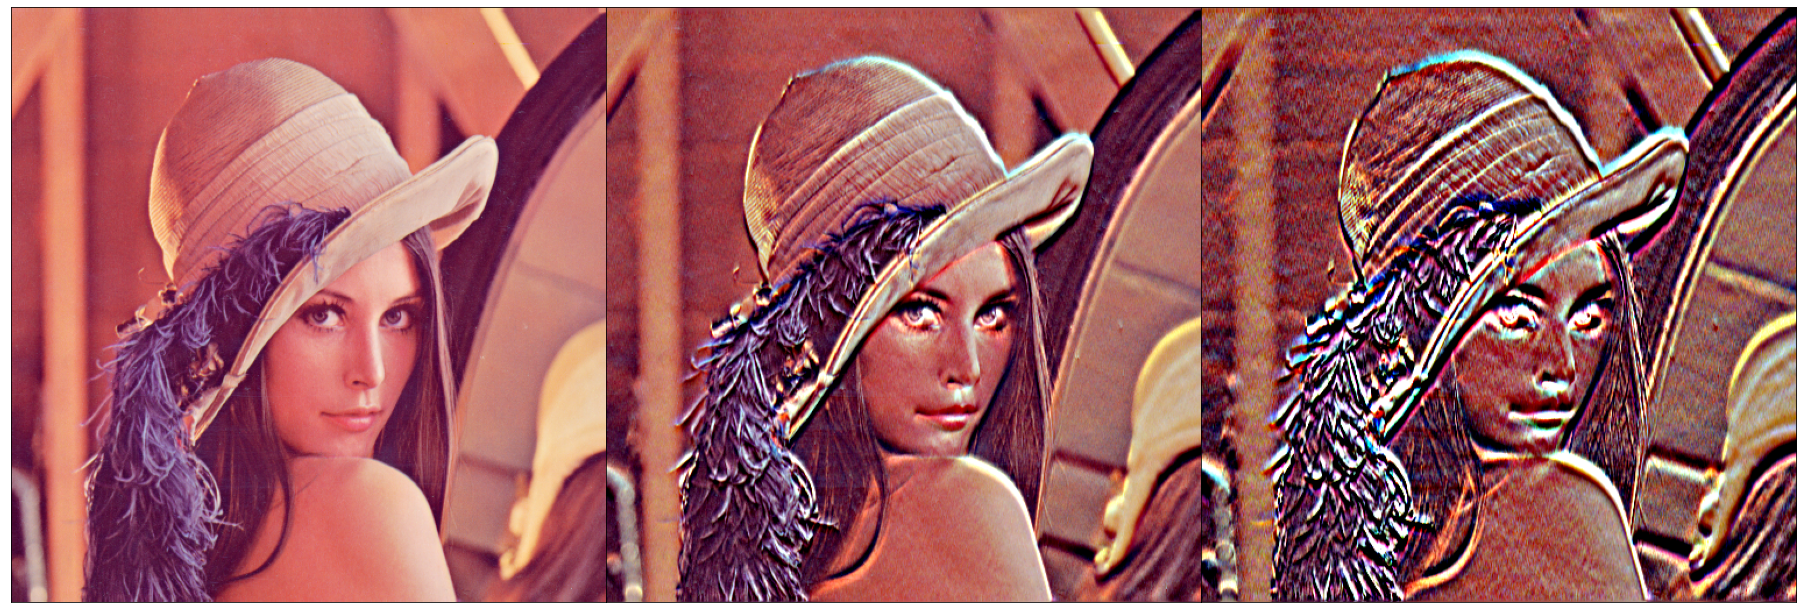

In [63]:
#testando para filtro de média, filtro gaussiano, sharpening e derivativo proposto por nós (h[n])

#filtro =  np.array([[-1,-1,-1],[-1, 9,-1],[-1,-1,-1]])  #sharpening 

#filtro = np.ones((1, 11), dtype="float32")/11   #media
#filtro = cv2.getGaussianKernel(ksize=10, sigma=0)  #gaussiano
#kernel = np.array([-1,0 , 1]) # kernel derivador ideal exemplo
linha, final =filtro_separavel(fir, img)

fig, ax = plt.subplots(1, 3, figsize=(32, 32))

fig.subplots_adjust(hspace=0, wspace=0)

ax[2].xaxis.set_major_locator(plt.NullLocator())
ax[2].yaxis.set_major_locator(plt.NullLocator())
ax[2].imshow(final)    

ax[1].xaxis.set_major_locator(plt.NullLocator())
ax[1].yaxis.set_major_locator(plt.NullLocator())
ax[1].imshow(linha)

ax[0].xaxis.set_major_locator(plt.NullLocator())
ax[0].yaxis.set_major_locator(plt.NullLocator())
ax[0].imshow(img)




#img_borradalinha = cv2.filter2D(img, -1, kernel)
#kernel = kernel.transpose()
#img_borradacol = cv2.filter2D(img_borradalinha, -1, kernel)
#img_borradacol = img_borradacol.transpose()
#img_borradacol = cv2.cvtColor(img_borradacol, cv2.COLOR_GRAY2RGB)


#imagem_borrada = cv2.GaussianBlur(img, (1,5), 0) #convoluindo com um filtro 1d
#imagem_borrada = imagem_borrada.transpose()     #transpondo o resultado
#imagem_borrada = cv2.GaussianBlur(img, (1,5), 0) #convoluindo com o mesmo filtro
#imagem_borrada = imagem_borrada.transpose()     #transpondo o resultado




#img_borradalinha = cv2.cvtColor(img_borradalinha, cv2.COLOR_GRAY2RGB)





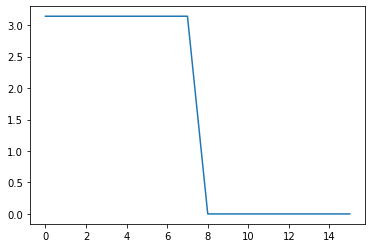

In [64]:
plot(np.angle(fir)) #so p ver
